## <u> Parameter scan to find FWM solutions clean </u>

#### <u> Import everything necessary...</u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# module_path = r"C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\FYP_Github_V2\Modules\Refractive_Indices"
#module_path = "C:\\Users\\molly\\OneDrive - University of Bath\\Uni\\Final Year\\Project\\FYP_Github_V2\\Modules\\Refractive_Indices"
sys.path.append("../Modules/Refractive_Indices/")

# Now you can import the class from the module
from RefractiveIndexClass import RefractiveIndex
import PhaseMatchingClass
PM = PhaseMatchingClass.PhaseMatching
# Global parameters
plt.rcParams['xtick.direction'] = 'in'  # x-axis ticks inside
plt.rcParams['ytick.direction'] = 'in'  # y-axis ticks inside
plt.rcParams['xtick.top'] = True        # draw ticks on the top side
plt.rcParams['ytick.right'] = True      # draw ticks on the right side
# plt.use('TkAgg')

figure_save_location = ""
save_format = 'eps'

In [2]:
def WavelengthTicksOnAngularFrequencyPlot(min_wavelength, max_wavelength, No_major_ticks, axis = 'x'):
    from matplotlib.ticker import FixedLocator, FuncFormatter
    major_wavelengths = np.linspace(min_wavelength, max_wavelength, No_major_ticks)
    # Calculate the corresponding frequencies for the major ticks
    major_frequencies = 2 * np.pi * 3e8 / major_wavelengths
    minor_ticks = np.linspace(min_wavelength, max_wavelength, 4*No_major_ticks + 2)
    minor_ticks = PM.lambda_to_ang_freq(minor_ticks)
    # Apply the custom transformation to the x-axis ticks
    if axis == 'x':
        plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{PM.lambda_to_ang_freq(x)*1e6:.2f}'))
        plt.gca().xaxis.set_major_locator(FixedLocator(major_frequencies))
        plt.gca().set_xticks(minor_ticks, minor=True)
    elif axis == 'y':
        plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{PM.lambda_to_ang_freq(x)*1e6:.2f}'))
        plt.gca().yaxis.set_major_locator(FixedLocator(major_frequencies))
        plt.gca().set_yticks(minor_ticks, minor=True)

#### <u> Define wavelengths </u>

In [92]:
pump_wavelengths = np.linspace(1e-6, 2.5e-6, 2000)
signal_wavelengths = np.linspace(0.9e-6, 5e-6, 2000)

#### <u> Define scan parameters </u>

In [93]:
Temperature = 293 # K
Pressure = 5000 # mBar
# 3.0000622639997694e-06
# Current parameters: [5.00000000e+03 7.72888731e-07 2.01022112e-05]
w = 0.78e-06
r_core = 15.0e-06
# w =  0.7e-6#6.08893154e-07 # m # 0.7e-6
# core_radius = 25.0e-6# 1.78141700e-05 # m #20e-6
#  12.0
gas = "argon"
gamma = 0.0
P_0 = 100

#### <u> To find reasonable initial parameters </u>

[1.62281141e-06]
[1.e-06]
j value
2.2367409182035196


(0.9998, 1.001)

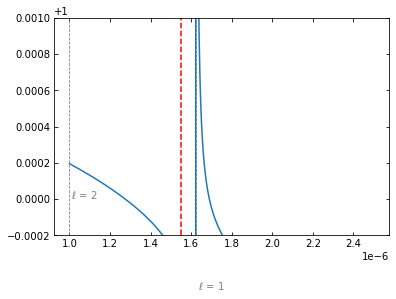

In [94]:
gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=Pressure, temperature=Temperature, gas_name=gas)
refractive_index = lambda x: RefractiveIndex.HCF(R=r_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, r_core, 0.7*r_core))
pump_wavelength = 1.550e-6

# Loss wavelengths so they can be identified:
loss_wavelengths = PM.find_loss_wavelengths(w,RefractiveIndex.n_air,RefractiveIndex.n_fs,pump_wavelengths,ms=[1,2])
i=0
for loss_wavelength in loss_wavelengths:
    print(loss_wavelength[0])
    if loss_wavelength[1] != 0:
        plt.axvline(loss_wavelength[0],linestyle = '--', color='gray', linewidth = 0.8)
        plt.text(x=loss_wavelength[0] + 0.01e-6, y=0.9995+i*0.0005,s=fr"$\ell$ = {loss_wavelength[1]}", color='gray')
        i +=1

plt.plot(pump_wavelengths, refractive_index(pump_wavelengths*1e9))
plt.axvline(pump_wavelength, color='r', linestyle='--')
plt.ylim([0.9998, 1.001])

#### <u> Tinkering with phase matching after solution ...</u>

/Users/jackmorse/Documents/University/Year 4/FYP/FYP_Simulations/PhaseMatchingClass.py:43: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))


j value
2.2367409182035196
j value
2.2367409182035196


../Modules/Refractive_Indices/RefractiveIndexClass.py:239: RuntimeWarning: invalid value encountered in true_divide
  n_squared_minus_1 = (pressure / p_0) * (T_0 / temperature) * ( (B_1 * wavelengths**2) / (wavelengths**2 - C_1) + (B_2) / (wavelengths**2 - C_2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:148: RuntimeWarning: invalid value encount

j value
2.2367409182035196


../Modules/Refractive_Indices/RefractiveIndexClass.py:156: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)
/Users/jackmorse/Documents/University/Year 4/FYP/FYP_Simulations/PhaseMatchingClass.py:83: RuntimeWarning: invalid value encountered in sqrt
  m_val = (2 * n_gas(wavelengths*1e9) * w / wavelengths) * ( (n_wall(wavelengths * 1e9) / n_gas(wavelengths * 1e9))**2 - 1 )**(1/2)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Longest wavelength soln: 3.0749823363983156e-06
1.4829609170970408e-06
1.0361472219373527e-06
3.0749823363983156e-06
Intersection 1: 3.0749823363983156e-06
Corresponding soln: 1.0361433098832212e-06
1.6234696595890453e-06
Resonance wavelength: (array([1.62238448e-06]), 1)
Resonance wavelength: (array([8.21584317e-07]), 2)
Resonance wavelength: (array([5.52730546e-07]), 3)
Resonance wavelength: (array([4.19263853e-07]), 4)
Resonance wavelength: (array([3.39567914e-07]), 5)
Figure Size: [6. 4.]


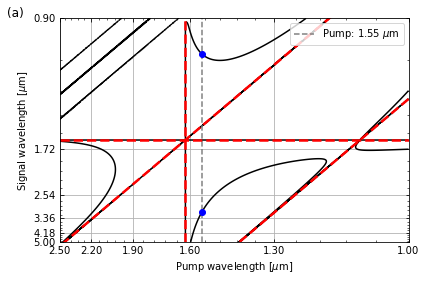

In [95]:
# 3.0632331751559895e-06
# Current parameters: [5.00000000e+03 5.11985949e-07 2.08880329e-05]
pump_value = 1.550e-6
target_value = 3e-6
gas_pressure = 5000
# w = 9.96E-07
# r_core = 2.52E-05
gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=gas_pressure, temperature=Temperature, gas_name=gas)
refractive_index = lambda x: RefractiveIndex.HCF(R=r_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, r_core, 0.7*r_core))

delta_beta = PM.phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=0, gamma=0)

contours = plt.contour(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], colors='k')
plt.axvline(PM.lambda_to_ang_freq(pump_value), color='gray', linestyle='--', label = fr"Pump: {pump_value*1e6} $\mu$m")
x_intercept = PM.lambda_to_ang_freq(pump_value)
intersections = PM.find_contour_intersections(contours, x_intercept)
# print(f"Intersections: {intersections}")
smallest_difference = 0
closest_solution = 0
count = 0
longest_wavelength = PM.lambda_to_ang_freq(min(intersections)[1])
print(f"Longest wavelength soln: {longest_wavelength}")
wavs = np.linspace(0.1e-6,2.5e-6,5000)
resonsance_wavelengths = PM.find_loss_wavelengths(w = w, n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=wavs,ms = [1,2,3,4,5])
show_plots = True
if show_plots == True:
    for intersect in intersections:
        print(PM.lambda_to_ang_freq(intersect[1]))
        if intersect[1] < PM.lambda_to_ang_freq(target_value):
            plt.plot(intersect[0], intersect[1], marker = 'o', color='blue')
            corresponding_soln = -1* intersect[1] +2* PM.lambda_to_ang_freq(pump_value)
            plt.plot(intersect[0], corresponding_soln, marker = 'o', color='blue')
            print(f"Intersection 1: {PM.lambda_to_ang_freq(intersect[1])}")
            print(f"Corresponding soln: {PM.lambda_to_ang_freq(corresponding_soln)}")
        
    cols = ["red", "red", "red", "red", "red"]
    count = 0
    for resonsance_wavelength in resonsance_wavelengths:
        resonances_linewidth = 2.5
        print(f"Resonance wavelength: {resonsance_wavelength}")
        const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
        plt.plot(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(const_idlers), color = cols[count], linestyle = '--', linewidth = resonances_linewidth)
        plt.axvline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = cols[count], linestyle = '--', linewidth = resonances_linewidth)
        plt.axhline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = cols[count], linestyle = '--', linewidth = resonances_linewidth)
        count += 1
    # plt.plot(PM.lambda_to_ang_freq(pump_value), PM.lambda_to_ang_freq(longest_wavelength), marker = 'o')
    # plt.xlim([])
    plt.xlim([min(PM.lambda_to_ang_freq(pump_wavelengths)), max(PM.lambda_to_ang_freq(pump_wavelengths))])
    plt.ylim([min(PM.lambda_to_ang_freq(signal_wavelengths)), max(PM.lambda_to_ang_freq(signal_wavelengths))])
    WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
    WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 6, axis='y')
    
    plt.legend(loc="upper right")   
    plt.grid()
    plt.ylabel(r"Signal wavelength [$\mu$m]")
    plt.xlabel(r"Pump wavelength [$\mu$m]")
    plt.text(-0.15, 1.05, "(a)", transform=plt.gca().transAxes, fontsize=12, va='top')
    plt.tight_layout()
    import os
    plt.savefig(os.path.join("../Report/Figures/", "phase-matching-plot-1550nm-pump" + "." + save_format), format = save_format)   
    figsize = plt.gca().figure.get_size_inches()
    print("Figure Size:", figsize)
    plt.show()
    
plt.close()

<!-- #### <u>Start scan </u> -->

In [9]:
min_w = 0.78e-6
max_w = 0.87e-6
pump_value = 1.550e-6
gas_pressure = 5000
r_core = 1.5e-5
# w = 9.96E-07
# r_core = 2.52E-05
ws = np.linspace(min_w, max_w, 50)
w_sols = []
for w in ws:
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=gas_pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=r_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, r_core, 0.7*r_core))

    delta_beta = PM.phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=0, gamma=0)

    contours = plt.contour(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], colors='k')
    x_intercept = PM.lambda_to_ang_freq(pump_value)
    intersections = PM.find_contour_intersections(contours, x_intercept)
    # print(f"Intersections: {intersections}")
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = PM.lambda_to_ang_freq(min(intersections)[1])
    w_sols.append(longest_wavelength)
    print(f"Longest wavelength soln: {longest_wavelength}")

    resonsance_wavelengths = PM.find_loss_wavelengths(w = w, n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=signal_wavelengths,ms = [1,2,3,4])
    show_plots = False
    if show_plots == True:
        for intersect in intersections:
            plt.plot(intersect[0], intersect[1], marker = 'x')
            print(f"Intersection: {PM.lambda_to_ang_freq(intersect[1])}")
        for resonsance_wavelength in resonsance_wavelengths:
            resonances_linewidth = 2.5
            print(f"Resonance wavelength: {resonsance_wavelength}")
            const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
            plt.plot(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axvline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axhline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        
        plt.plot(PM.lambda_to_ang_freq(pump_value), PM.lambda_to_ang_freq(longest_wavelength), marker = 'o')
        plt.xlim([min(PM.lambda_to_ang_freq(pump_wavelengths)), max(PM.lambda_to_ang_freq(pump_wavelengths))])
        plt.ylim([min(PM.lambda_to_ang_freq(signal_wavelengths)), max(PM.lambda_to_ang_freq(signal_wavelengths))])
        WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
        WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')    
        plt.show()
    plt.close()



j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.074982737799321e-06
j value
2.2367520819882936
j value
2.2367520819882936
j value
2.2367520819882936
Longest wavelength soln: 3.028578035011726e-06
j value
2.236763242615222
j value
2.236763242615222
j value
2.236763242615222
Longest wavelength soln: 2.9861590883812e-06
j value
2.236774400084305
j value
2.236774400084305
j value
2.236774400084305
Longest wavelength soln: 2.947241983762087e-06
j value
2.2367855543955426
j value
2.2367855543955426
j value
2.2367855543955426
Longest wavelength soln: 2.9114184651171304e-06
j value
2.236796705548935
j value
2.236796705548935
j value
2.236796705548935
Longest wavelength soln: 2.878343359706922e-06
j value
2.236807853544482
j value
2.236807853544482
j value
2.236807853544482
Longest wavelength soln: 2.847721643409608e-06
j value
2.2368189983821836
j value
2.2368189983821836
j value
2.2368189983821836
Longest wavelength soln: 2.819300232

[3.074982737799321e-06, 3.028578035011726e-06, 2.9861590883812e-06, 2.947241983762087e-06, 2.9114184651171304e-06, 2.878343359706922e-06, 2.847721643409608e-06, 2.819300232386663e-06, 2.7928602327580705e-06, 2.768210890739842e-06, 2.7451876131028394e-06, 2.723644117898307e-06, 2.7034530274437872e-06, 2.6845010062276434e-06, 2.6666875092936283e-06, 2.6499225453797594e-06, 2.63412704167481e-06, 2.6192289276620607e-06, 2.6051635384401854e-06, 2.591872512046028e-06, 2.579303720628416e-06, 2.5674089420505067e-06, 2.5561449521174966e-06, 2.5454720749180403e-06, 2.5353542477757823e-06, 2.525758170797991e-06, 2.5166540651644897e-06, 2.508012746598909e-06, 2.499809594787326e-06, 2.492020607636716e-06, 2.484624076234832e-06, 2.477598653705293e-06, 2.4709268799289424e-06, 2.4645903477033058e-06, 2.458572930552919e-06, 2.4528595322075646e-06, 2.4474356965857414e-06, 2.442288900146204e-06, 2.437406125084214e-06, 2.4327764511162405e-06, 2.4283880708517874e-06, 2.4242313612176944e-06, 2.4202967567478

Text(0, 0.5, '$\\Delta \\lambda_s$ [$\\mu$m]')

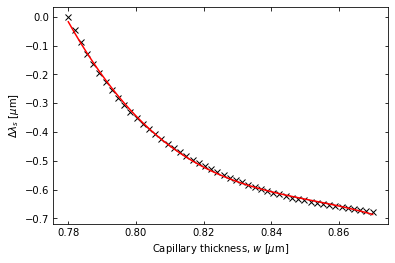

In [122]:
print(w_sols)
ws2 = ws*1e6
w_sols2 = np.array(w_sols)*1e6
w_sols2 = w_sols2 - w_sols2[0] # Difference
plt.plot(ws2, w_sols2, marker='x', linestyle='', color='k')
w_coeffs = np.polyfit(ws2, w_sols2,3)
plt.plot(ws2, np.polyval(w_coeffs, ws2), color='r')
plt.xlabel(r"Capillary thickness, $w$ [$\mu$m]")
plt.ylabel(r"$\Delta \lambda_s$ [$\mu$m]")

In [101]:
min_r = 15e-6
max_r = 25e-6
pump_value = 1.550e-6
gas_pressure = 5000
w=0.78e-6
print(f"w = {w}")
# w = 9.96E-07
# r_core = 2.52E-05
rs = np.linspace(min_r, max_r, 50)
r_sols = []
for r in rs:
    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=gas_pressure, temperature=Temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=r, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, r, 0.7*r))

    delta_beta = PM.phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=0, gamma=0)

    contours = plt.contour(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], colors='k')
    x_intercept = PM.lambda_to_ang_freq(pump_value)
    intersections = PM.find_contour_intersections(contours, x_intercept)
    # print(f"Intersections: {intersections}")
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = PM.lambda_to_ang_freq(min(intersections)[1])
    r_sols.append(longest_wavelength)
    print(f"Longest wavelength soln: {longest_wavelength}")

    resonsance_wavelengths = PM.find_loss_wavelengths(w = w, n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=signal_wavelengths,ms = [1,2,3,4])
    show_plots = False
    if show_plots == True:
        for intersect in intersections:
            plt.plot(intersect[0], intersect[1], marker = 'x')
            print(f"Intersection: {PM.lambda_to_ang_freq(intersect[1])}")
        for resonsance_wavelength in resonsance_wavelengths:
            resonances_linewidth = 2.5
            print(f"Resonance wavelength: {resonsance_wavelength}")
            const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
            plt.plot(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axvline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axhline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        
        plt.plot(PM.lambda_to_ang_freq(pump_value), PM.lambda_to_ang_freq(longest_wavelength), marker = 'o')
        plt.xlim([min(PM.lambda_to_ang_freq(pump_wavelengths)), max(PM.lambda_to_ang_freq(pump_wavelengths))])
        plt.ylim([min(PM.lambda_to_ang_freq(signal_wavelengths)), max(PM.lambda_to_ang_freq(signal_wavelengths))])
        WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
        WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')    
        plt.show()
    plt.close()

w = 7.8e-07


/Users/jackmorse/Documents/University/Year 4/FYP/FYP_Simulations/PhaseMatchingClass.py:43: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))


j value
2.2367409182035196
j value
2.2367409182035196


../Modules/Refractive_Indices/RefractiveIndexClass.py:239: RuntimeWarning: invalid value encountered in true_divide
  n_squared_minus_1 = (pressure / p_0) * (T_0 / temperature) * ( (B_1 * wavelengths**2) / (wavelengths**2 - C_1) + (B_2) / (wavelengths**2 - C_2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:148: RuntimeWarning: invalid value encount

j value
2.2367409182035196


../Modules/Refractive_Indices/RefractiveIndexClass.py:156: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)


Longest wavelength soln: 3.0749823363983156e-06
j value
2.2366772218293822
j value
2.2366772218293822
j value
2.2366772218293822
Longest wavelength soln: 3.0618350757863794e-06
j value
2.236615114211042
j value
2.236615114211042
j value
2.236615114211042
Longest wavelength soln: 3.0489496842744827e-06
j value
2.236554536859132
j value
2.236554536859132
j value
2.236554536859132
Longest wavelength soln: 3.0363196407581366e-06
j value
2.23649543410874
j value
2.23649543410874
j value
2.23649543410874
Longest wavelength soln: 3.0239376705618154e-06
j value
2.2364377529517276
j value
2.2364377529517276
j value
2.2364377529517276
Longest wavelength soln: 3.011796796231461e-06
j value
2.2363814428807958
j value
2.2363814428807958
j value
2.2363814428807958
Longest wavelength soln: 2.999890424192115e-06
j value
2.236326455744348
j value
2.236326455744348
j value
2.236326455744348
Longest wavelength soln: 2.9882118264617146e-06
j value
2.236272745611303
j value
2.236272745611303
j value
2.2362

[3.0749823363983156e-06, 3.0618350757863794e-06, 3.0489496842744827e-06, 3.0363196407581366e-06, 3.0239376705618154e-06, 3.011796796231461e-06, 2.999890424192115e-06, 2.9882118264617146e-06, 2.976754565021562e-06, 2.9655134841531677e-06, 2.954481505773256e-06, 2.9436538441831727e-06, 2.933024974839153e-06, 2.922589413015446e-06, 2.9123419523869456e-06, 2.9022776511691403e-06, 2.892391819214386e-06, 2.882680006027096e-06, 2.873137877403442e-06, 2.8637599864716024e-06, 2.8545437595779945e-06, 2.845483495665476e-06, 2.8365766395413067e-06, 2.8278188288076404e-06, 2.8192059124021796e-06, 2.8107349236307844e-06, 2.8024023021631976e-06, 2.794204642315877e-06, 2.786138694148947e-06, 2.778201356454928e-06, 2.7703896610921414e-06, 2.7627000664947992e-06, 2.7551300854999805e-06, 2.7476774280015046e-06, 2.7403384992175484e-06, 2.733111307950007e-06, 2.7259930208788788e-06, 2.71898148013229e-06, 2.712073592334503e-06, 2.705267980418852e-06, 2.698561827697025e-06, 2.6919525939958305e-06, 2.68543875

Text(0, 0.5, '$\\Delta \\lambda_s$ [$\\mu$m]')

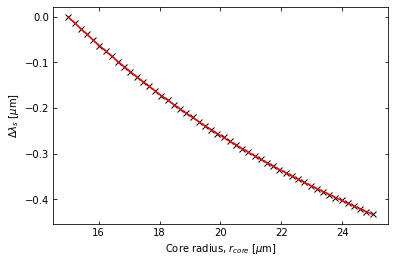

In [121]:
print(r_sols)
rs2 = rs*1e6
r_sols2 = np.array(r_sols)*1e6
r_sols2 = r_sols2 - r_sols2[0]
plt.plot(rs2, r_sols2, marker='x', linestyle='', color='k')
r_coeffs = np.polyfit(rs2, r_sols2,3)
plt.plot(rs2, np.polyval(r_coeffs, rs2), color='r')
plt.xlabel(r"Core radius, $r_{core}$ [$\mu$m]")
plt.ylabel(r"$\Delta \lambda_s$ [$\mu$m]")

In [13]:
min_pressure = 1e3
max_pressure = 10e3
pump_value = 1.550e-6
gas_pressure = 1000000
gas = "xenon"
w=0.78e-6
r_core=15e-6
# w = 9.96E-07
# r_core = 2.52E-05
ps = np.linspace(min_pressure, max_pressure, 10)
gases = ["Helium", "Neon", "Argon", "Krypton", "Xenon"]
gas_sols = []
for gas in gases:
    print(f"Gas: {gas}")
    p_sols = []
    for gas_pressure in ps:
        gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=gas_pressure, temperature=Temperature, gas_name=gas)
        refractive_index = lambda x: RefractiveIndex.HCF(R=r_core, w=w, wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, w, r_core, 0.7*r_core))

        delta_beta = PM.phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=0, gamma=0)

        contours = plt.contour(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], colors='k')
        x_intercept = PM.lambda_to_ang_freq(pump_value)
        intersections = PM.find_contour_intersections(contours, x_intercept)
        # print(f"Intersections: {intersections}")
        smallest_difference = 0
        closest_solution = 0
        count = 0
        longest_wavelength = PM.lambda_to_ang_freq(min(intersections)[1])
        p_sols.append(longest_wavelength)
        print(f"Longest wavelength soln: {longest_wavelength}")
        wavs = np.linspace(0.1e-6,2.5e-6,5000)
        resonsance_wavelengths = PM.find_loss_wavelengths(w = w, n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=wavs,ms = [1,2,3,4])
        show_plots = False
        if show_plots == True:
            for intersect in intersections:
                plt.plot(intersect[0], intersect[1], marker = 'x')
                print(f"Intersection: {PM.lambda_to_ang_freq(intersect[1])}")
            for resonsance_wavelength in resonsance_wavelengths:
                resonances_linewidth = 2.5
                print(f"Resonance wavelength: {resonsance_wavelength}")
                const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
                plt.plot(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
                plt.axvline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
                plt.axhline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            
            plt.plot(PM.lambda_to_ang_freq(pump_value), PM.lambda_to_ang_freq(longest_wavelength), marker = 'o')
            plt.xlim([min(PM.lambda_to_ang_freq(pump_wavelengths)), max(PM.lambda_to_ang_freq(pump_wavelengths))])
            plt.ylim([min(PM.lambda_to_ang_freq(signal_wavelengths)), max(PM.lambda_to_ang_freq(signal_wavelengths))])
            WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
            WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')    
            plt.show()
        plt.close()
    gas_sols.append(p_sols)


Gas: Helium
j value
2.2367409182035196


/Users/jackmorse/Documents/University/Year 4/FYP/FYP_Simulations/PhaseMatchingClass.py:43: RuntimeWarning: divide by zero encountered in true_divide
  idler_matrix_wavelengths = 1 / (2/(pump_matrix_wavelengths) - 1/(signal_matrix_wavelengths))


j value
2.2367409182035196


../Modules/Refractive_Indices/RefractiveIndexClass.py:239: RuntimeWarning: invalid value encountered in true_divide
  n_squared_minus_1 = (pressure / p_0) * (T_0 / temperature) * ( (B_1 * wavelengths**2) / (wavelengths**2 - C_1) + (B_2) / (wavelengths**2 - C_2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:58: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 + (0.6961663 * wavelength**2) / (wavelength**2  - 0.0684043**2) + (0.4079426 * wavelength**2) / (wavelength**2 - 0.1162414**2) + (0.8974794 * wavelength**2) / (wavelength**2 - 9.896161**2))
../Modules/Refractive_Indices/RefractiveIndexClass.py:148: RuntimeWarning: invalid value encount

j value
2.2367409182035196


../Modules/Refractive_Indices/RefractiveIndexClass.py:156: RuntimeWarning: invalid value encountered in sqrt
  n_eff_lambda = n_gas(wavelengths) -(jz**2)/(2 * k_0_lambda**2 * n_gas(wavelengths) * R**2) - (jz**2)/(k_0_lambda**3 * n_gas(wavelengths)**2 * R**3)*(1)/(np.tan(phi_lambda) * np.sqrt(epsilon_lambda - 1))*((epsilon_lambda + 1))/(2)


Longest wavelength soln: 3.066683635972231e-06


/Users/jackmorse/Documents/University/Year 4/FYP/FYP_Simulations/PhaseMatchingClass.py:83: RuntimeWarning: invalid value encountered in sqrt
  m_val = (2 * n_gas(wavelengths*1e9) * w / wavelengths) * ( (n_wall(wavelengths * 1e9) / n_gas(wavelengths * 1e9))**2 - 1 )**(1/2)


j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.0671075866937607e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.067531464689321e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.0679558728471135e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.0683808121469513e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.068806279602035e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.0692319321921367e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength soln: 3.0696577256259873e-06
j value
2.2367409182035196
j value
2.2367409182035196
j value
2.2367409182035196
Longest wavelength

[3.075158420218479e-06, 3.0842218289057175e-06, 3.0934559203615733e-06, 3.1028649566776407e-06, 3.1124534699408862e-06, 3.1222270449822467e-06, 3.1321908458520724e-06, 3.1423503282906598e-06, 3.152711260925143e-06, 3.163279406046742e-06]


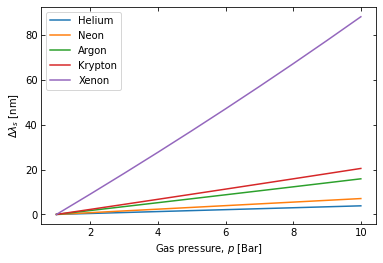

In [107]:
print(p_sols)


ps2 = ps*1e-3
for i in range(len(gas_sols)):
    p_sols2 = np.array(gas_sols[i])*1e6
    p_sols2 = (p_sols2 - (p_sols2[0]))*1e3 # Difference and convert to nm
    plt.plot(ps2, p_sols2, label=gases[i])
    p_coeffs = np.polyfit(ps2, p_sols2,3)
    # plt.plot(ps2, np.polyval(p_coeffs, ps2), color='r')
plt.xlabel(r"Gas pressure, $p$ [Bar]")
plt.ylabel(r"$\Delta \lambda_s$ [nm]")
plt.legend()

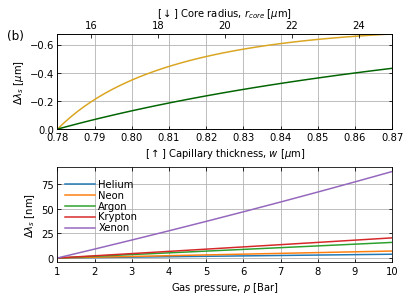

In [128]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4.2))  # 3 rows, 1 column
fig.subplots_adjust(hspace=0.4)  # Adjust vertical spacing between subplots

# Plot the first figure
color1 = "goldenrod"
color2='darkgreen'
ax0_y_twin = axs[0].twiny()
axs[0].plot(ws*1e6, w_sols2, color=color1, label="Capillary")
axs[0].set_xlabel(r"$[\uparrow]$ Capillary thickness, $w$ [$\mu$m]")
axs[0].set_ylabel(r"$\Delta \lambda_s$ [$\mu$m]")
ax0_y_twin.plot(rs*1e6, r_sols2, color=color2, label="Core")
ax0_y_twin.set_xlabel(r"$[\downarrow]$ Core radius, $r_{core}$ [$\mu$m]")
axs[0].plot([0.842, 0.851], [0.5, 0.5], color=color2)
axs[0].annotate("Core", [0.853, 0.475], color=color2)
axs[0].plot([0.842, 0.851], [0.4, 0.4], color=color1)
axs[0].annotate("Capillary", [0.853, 0.37], color=color1)
axs[0].set_xlim([min(ws)*1e6, max(ws)*1e6])
ax0_y_twin.set_xlim([min(rs)*1e6, max(rs)*1e6])
axs[0].set_ylim([max(w_sols2), min(w_sols2)])
axs[0].grid()

import webcolors
# Plot the third figure
# axs[1].plot(np.array(ps)*1e-3,a p_sols2, color=color1)
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
legend_line_coords = [1.2, 2]
legend_y_start = 75
legend_delta_y = 11
legend_text_rel_shift = [0.1, 3]
for i in range(len(gas_sols)):
    p_sols2 = np.array(gas_sols[i])*1e6
    p_sols2 = (p_sols2 - (p_sols2[0]))*1e3 # Difference and convert to nm
    axs[1].plot(ps2, p_sols2, color=default_colors[i], label=gases[i])
    # line_color = axs[1].get_lines()[i].get_color()
    # print(f"{gases[i]} has color {webcolors.rgb_to_name(webcolors.hex_to_rgb(line_color))}")
    # axs[1].plot(2,50, marker='x')
    axs[1].plot([legend_line_coords[0], legend_line_coords[1]], [legend_y_start - i * legend_delta_y, legend_y_start - i * legend_delta_y], color=default_colors[i])
    axs[1].annotate(str(gases[i]), [legend_line_coords[1] + legend_text_rel_shift[0], legend_y_start - i * legend_delta_y - legend_text_rel_shift[1]])
    # p_coeffs = np.polyfit(ps2, p_sols2,3)
axs[1].set_xlabel(r"Gas pressure, $p$ [Bar]")
axs[1].set_ylabel(r"$\Delta \lambda_s$ [nm]")
axs[1].set_xlim([min(np.array(ps))*1e-3, max(np.array(ps))*1e-3])
axs[1].grid()
# axs[1].show_legend()
# axs[1].set_ylim([min(p_sols2), max(p_sols2)])
plt.text(-0.15, 1.05, "(b)", transform=plt.gca().transAxes, fontsize=12, va='top')
# plt.tight_layout()
import os
plt.savefig(os.path.join("../Report/Figures/", "variation-of-parameters" + "." + save_format), format = save_format)   
plt.show()


# line = plt.gca().get_lines()[0]  # Assuming you have only one line plotted

# # Retrieve the color of the line
# line_color = line.get_color()

# Show the plots
plt.show()

In [116]:
print(p_sols2)
print(w_sols2)

[ 0.          9.06340869 18.29750014 27.70653646 37.29504972 47.06862476
 57.03242563 67.19190807 77.55284071 88.12098583]
[ 0.         -0.0464047  -0.08882365 -0.12774075 -0.16356427 -0.19663938
 -0.22726109 -0.25568251 -0.28212251 -0.30677185 -0.32979512 -0.35133862
 -0.37152971 -0.39048173 -0.40829523 -0.42506019 -0.4408557  -0.45575381
 -0.4698192  -0.48311023 -0.49567902 -0.5075738  -0.51883779 -0.52951066
 -0.53962849 -0.54922457 -0.55832867 -0.56696999 -0.57517314 -0.58296213
 -0.59035866 -0.59738408 -0.60405586 -0.61039239 -0.61640981 -0.62212321
 -0.62754704 -0.63269384 -0.63757661 -0.64220629 -0.64659467 -0.65075138
 -0.65468598 -0.65840748 -0.66192483 -0.66524573 -0.66837728 -0.67132771
 -0.6741026  -0.67670925]


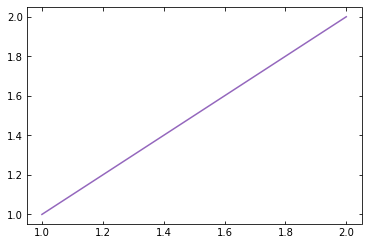

In [112]:
plt.plot([1,2], [1,2], color = '#9467bd')

#### Start scan

In [ ]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
# * * * * * * * * * Parameters * * * * * * * * #
temperature = 293                                           # K

pressure = 5000                                             # mBar
pressure_bounds = (1000, 10000)

capillary_wall_thickness = 0.8e-6                           # m
capillary_wall_thickness_bounds = (0.7e-6, 0.9e-6)

capillary_radius = 0.7 * 22e-6                              # m

core_radius = 22e-6 # 1.94260646e-05 # 22e-6                                         # m
core_radius_bounds = (15e-6, 30e-6)

gas = "argon"
nonlinearity_gamma = 0.0                                                 # Nonlinearity parameter
power = 100
# * * * * * * * * * * * * * * * * * * * * * * * #

optimize_params = [pressure, capillary_wall_thickness, core_radius]
bounds = [pressure_bounds, capillary_wall_thickness_bounds, core_radius_bounds]
fixed_params = {"gas": "argon", "temperature": temperature, "capillary_radius": capillary_radius, "nonlinearity_gamma": nonlinearity_gamma, "power": power}
target_value = 3.0e-6
pump_value = 1.550e-6

print(fixed_params["power"])
def black_box_function(optimize_params, target_value, pump_value, pump_wavelengths, signal_wavelengths, fixed_params, loss_ms = [1,2], show_plots = False):
    '''
    This function is built for the optimization of finding phase matching solutions at a given wavelength, 
    for a given pump wavelength, for a range of paramaters which are searched externally using scipy minimise.

    Parameters
    -------
    optimize_params ([float]): An array of paramaters. Order matters so be careful.
    target_value (float): Phase matching solution you seek, given as a wavelength in meters.
    pump_value (float): The pump wavelength you are considering, given as in meters.
    pump_wavelengths ([float]): An array of the pump wavelengths. The phase matching works for a range of wavelengths. This could be improved. Give the array in meters.
    signal_wavelengths ([float]): An array of the signal wavelengths (must contain the target value). Given as an array in meters.
    fixed_params {dict}: This is dependent on the optimization parameters and contains all remaining variables. 

    Returns
    -------
    The difference of the closest phase matching solution to target value.
    '''

    gas_index = lambda x: RefractiveIndex.Gas(wavelengths=x, pressure=optimize_params[0], temperature=temperature, gas_name=gas)
    refractive_index = lambda x: RefractiveIndex.HCF(R=optimize_params[2], w=optimize_params[1], wavelengths=x, n_gas=gas_index, normalised_gap=RefractiveIndex.calculate_gamma(6, optimize_params[1], optimize_params[2], 0.7*optimize_params[2]))

    delta_beta = PM.phase_matching(pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, refractive_index=refractive_index, show_plots=False, P=fixed_params["power"], gamma=fixed_params["nonlinearity_gamma"])
    
    contours = plt.contour(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(signal_wavelengths), delta_beta, levels=[0], colors='k')
    x_intercept = PM.lambda_to_ang_freq(pump_value)
    intersections = PM.find_contour_intersections(contours, x_intercept)
    smallest_difference = 0
    closest_solution = 0
    count = 0
    longest_wavelength = PM.lambda_to_ang_freq(min(intersections)[1])
    print(f"Current longest wavelength soln: {longest_wavelength}")
    print(f"Current parameters: {optimize_params}")

    resonsance_wavelengths = PM.find_loss_wavelengths(w = optimize_params[1], n_gas=gas_index, n_wall=RefractiveIndex.n_fs, wavelengths=signal_wavelengths,ms = loss_ms)

    if show_plots == True:
        for intersect in intersections:
            plt.plot(intersect[0], intersect[1], marker = 'x')

        for resonsance_wavelength in resonsance_wavelengths:
            resonances_linewidth = 2.5
            print(f"Resonance wavelength: {resonsance_wavelength}")
            const_idlers = 1 / ( (2 / pump_wavelengths) - (1 / resonsance_wavelength[0]))
            plt.plot(PM.lambda_to_ang_freq(pump_wavelengths), PM.lambda_to_ang_freq(const_idlers), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axvline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
            plt.axhline(PM.lambda_to_ang_freq(resonsance_wavelength[0]), color = 'r', linestyle = '--', linewidth = resonances_linewidth)
        
        plt.plot(PM.lambda_to_ang_freq(pump_value), PM.lambda_to_ang_freq(longest_wavelength), marker = 'o')
        plt.xlim([min(PM.lambda_to_ang_freq(pump_wavelengths)), max(PM.lambda_to_ang_freq(pump_wavelengths))])
        plt.ylim([min(PM.lambda_to_ang_freq(signal_wavelengths)), max(PM.lambda_to_ang_freq(signal_wavelengths))])
        WavelengthTicksOnAngularFrequencyPlot(min(pump_wavelengths), max(pump_wavelengths), 6, axis='x')    
        WavelengthTicksOnAngularFrequencyPlot(min(signal_wavelengths), max(signal_wavelengths), 7, axis='y')    
        plt.show()
    plt.close()

    difference = abs(longest_wavelength - target_value)
    return difference

val = black_box_function(optimize_params, target_value, pump_value, pump_wavelengths, signal_wavelengths, fixed_params)
print(val)
from functools import partial
obj_func = partial(black_box_function, target_value=target_value, pump_value=pump_value, pump_wavelengths=pump_wavelengths, signal_wavelengths=signal_wavelengths, fixed_params=fixed_params, show_plots = True)
# result = minimize(obj_func, optimize_params, bounds=bounds, tol=1.0e-12, method="DE") # e-28
result = differential_evolution(obj_func, bounds=bounds, tol=1e-12)
print("result")
print(result)
print("Final plot: ")
